In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
DATA_FILE = './data/data.csv'

data = pd.read_csv(DATA_FILE)
continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4',
              'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4',
              'Family_Hist_5']
discrete = ['Medical_History_1', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']
dummy = [col for col in data.columns if col.startswith('Medical_Keyword')]
categorical = list(set(data.columns) - set(continuous) - set(discrete) - set(dummy) - {'Response', 'Id'})

labels = data['Response']


In [126]:

cross_tab = pd.crosstab(index=data[col1], columns=data[col2].fillna(0),
                             margins=True)
ratios = ((cross_tab[['All']] / cross_tab['All']['All']).drop('All', axis=0))
counts = (cross_tab.loc[['All']].drop('All', axis=1))

observed = cross_tab.drop('All', axis=1).drop('All', axis=0)
expected = ratios.dot(counts)

print(observed.shape)
print(expected.shape)



(8, 1)
(8, 1)


In [102]:
stats.chisquare(observed, f_exp=expected)

Power_divergenceResult(statistic=array([ 195.35910061,   42.8591446 ,   50.28820098,   40.27701878,
        182.34308617,  640.61828324, 3538.25099494,  327.67905455,
        102.16891576,  181.22158114,   26.44505023,   15.02223916,
          8.84967448,   16.70099021, 1179.5719007 ,  403.79668829,
        283.92634622, 1283.30900889,  155.73913573]), pvalue=array([1.10251854e-038, 3.55116031e-007, 1.26799783e-008, 1.11407043e-006,
       6.23324292e-036, 4.33757186e-134, 0.00000000e+000, 7.35367796e-067,
       3.84412907e-019, 1.07552718e-035, 4.19269282e-004, 3.57153856e-002,
       2.63629806e-001, 1.94293968e-002, 1.84594085e-250, 3.65850028e-083,
       1.63192973e-057, 6.78202029e-273, 2.52641826e-030]))

In [106]:
chi_squared = (((observed - expected)**2)/expected).sum().sum()
chi_squared

8674.42641467397

In [179]:
col1 = 'Response'
col2 = 'Medical_Keyword_4'
cross_tab = pd.crosstab(data[col1], data[col2])

chi_stats = stats.chi2_contingency(cross_tab)
chi = chi_stats[0]
n = cross_tab.sum().sum()
r,k = cross_tab.shape
v = math.sqrt((chi / n) / min(k - 1, r - 1))
print(v)
print(chi_stats[1])

0.041198558611689695
7.413926942817e-19


In [6]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

# returns Cramer's V and chi2 p-value
def cramers_v(data, col1, col2):
    cross_tab = pd.crosstab(data[col1], data[col2])

    chi_stats = stats.chi2_contingency(cross_tab)
    n = cross_tab.sum().sum()
    r,k = cross_tab.shape
    v = math.sqrt((chi_stats[0] / n) / min(k - 1, r - 1))
    return v, chi_stats[1]

def categorical_relation_with(data, target, cols):
    cross = np.array([ cramers_v(data, cols[i], target) for i in range(len(cols))])

    v_table = pd.Series(cross[:, 0], index=cols)
    p_table = pd.Series(cross[:, 1], index=cols)
    return v_table, p_table

def cross_categorical(data, cols):
    cross = np.array([
        [cramers_v(data,cols[i], cols[j]) if i < j else (1, 0)
         for j in range(len(cols))]
        for i in range(len(cols))
    ])
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i > j:
                cross[i,j] = cross[j,i]

    v_table = pd.DataFrame(cross[:,:,0], index=cols, columns=cols)
    p_table = pd.DataFrame(cross[:,:,1], index=cols, columns=cols)
    return v_table, p_table


In [7]:
cols = ['Response', 'X', 'Medical_Keyword_1', 'Medical_Keyword_2']
top = categorical_relation_with(data, 'Response', categorical + dummy)
top_categorical = top[0].sort_values(ascending=False).index[0:10]
top[1].sort_values(ascending=False)

Medical_Keyword_45      1.945235e-01
Medical_Keyword_32      6.464173e-02
Medical_Keyword_20      4.479636e-02
Medical_Keyword_2       1.293240e-02
Medical_Keyword_6       1.851660e-03
Product_Info_7          1.669613e-03
Medical_Keyword_39      6.049608e-04
Medical_Keyword_44      1.049744e-04
Medical_Keyword_26      6.123048e-05
Medical_Keyword_5       3.833682e-05
Medical_Keyword_8       1.770195e-05
Medical_Keyword_29      1.616425e-05
Medical_Keyword_17      4.975456e-06
Medical_Keyword_41      3.649027e-06
Medical_Keyword_21      9.080017e-08
Medical_Keyword_7       2.086971e-08
Product_Info_5          7.790525e-09
Medical_Keyword_11      5.059962e-09
Medical_History_37      2.563703e-10
Medical_Keyword_14      1.300687e-11
Medical_Keyword_28      2.926327e-12
Medical_Keyword_13      2.403973e-13
Medical_Keyword_34      2.868459e-14
Medical_History_25      1.916547e-14
Medical_Keyword_12      1.994498e-15
Medical_Keyword_36      8.174872e-16
Medical_History_36      2.273692e-16
M

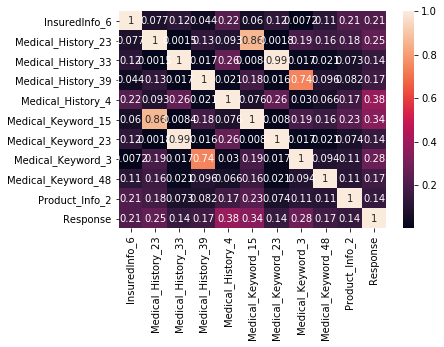

In [11]:
cols = ['Response', 'Medical_Keyword_1', 'X']
v, p = cross_categorical(data, sorted(list(top_categorical)) + ['Response'])
# sns.heatmap(p, annot=True, vmax=0.15)
sns.heatmap(v, annot=True)

In [206]:

np.array([[i+j if i<j else 1 for j in range(len(cols))] for i in range(len(cols))])

array([[1, 1, 2],
       [1, 1, 3],
       [1, 1, 1]])